# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD28"
COLLABORATORS = "Radosław Matuszczyk 405124, Piotr Łukasiewicz 406163"

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 1/2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import math

In [4]:
# Dane do testów
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["x"])
test_data_1.head()

,x
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [5]:
# Dane do testów
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["x"])
test_data_2.head()

,x
0,False
1,False
2,False
3,False
4,True


### Zadanie 1: Weryfikacja hipotezy o wartości przeciętnej [10 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki t.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk t i t_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku t i t_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: μ = 5`</br>
    `H1: μ ≠ 5`</br>
    `t = -0.0170, t_alpha = 2.1448`</br>
    `|t| < t_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [6]:
def mean_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    n = len(data)
    t = (data['x'].mean()-H0)/data['x'].std()*np.sqrt(n)
    
    x_start = sp.stats.t.ppf(df=n-1, q=0.0001)
    x_stop = sp.stats.t.ppf(df=n-1, q=0.9999)
    x = np.linspace(x_start, x_stop, 1000)
    y = sp.stats.t.pdf(x, df=n-1)
    plt.figure(figsize=(8,3))
    plt.plot(x, y, 'k')
    
    if H1 == 'two-sided':
        t_a = sp.stats.t.ppf(1-alpha/2, n-1)
        H = int(abs(t)>=t_a)
        sign = '≠'
        comp = '|t| ≥ t_alpha' if H else '|t| < t_alpha'
        edge1 = np.searchsorted(x, sp.stats.t.ppf(df=n-1, q=alpha/2))
        edge2 = np.searchsorted(x, sp.stats.t.ppf(df=n-1, q=1-alpha/2))
        plt.fill_between(x[:edge1], y[:edge1], color='tab:green')
        plt.fill_between(x[edge2:], y[edge2:], color='tab:green')
    elif H1 == 'less':
        t_a = sp.stats.t.ppf(alpha, n-1)
        H = int(t<=t_a)
        sign = '<'
        comp = 't ≤ t_alpha' if H else 't > t_alpha'
        edge1 = np.searchsorted(x, sp.stats.t.ppf(df=n-1, q=alpha))
        plt.fill_between(x[:edge1], y[:edge1], color='tab:green')
    elif H1 == 'greater':
        t_a = sp.stats.t.ppf(1-alpha, n-1)
        H = int(t>=t_a)
        sign = '>'
        comp = 't ≥ t_alpha' if H else 't < t_alpha'
        edge2 = np.searchsorted(x, sp.stats.t.ppf(df=n-1, q=1-alpha))
        plt.fill_between(x[edge2:], y[edge2:], color='tab:green')

    plt.vlines(t, ymin=0, ymax=y.max()/3, color='r')
    if H:
        plt.title("""H0: μ = {0}
H1: μ {1} {0}
t = {2:.4}, t_alpha = {3:.4}
{4}
Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {5}""".format(H0, sign, t, t_a, comp, 1-alpha), fontsize=10)
    else:
        plt.title("""H0: μ = {0}
H1: μ {1} {0}
t = {2:.4}, t_alpha = {3:.4}
{4}
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {5}""".format(H0, sign, t, t_a, comp, 1-alpha), fontsize=10)
    plt.show()
        
    return t, t_a, H

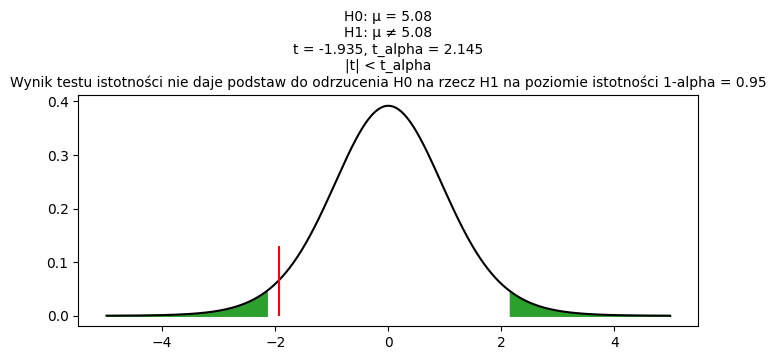

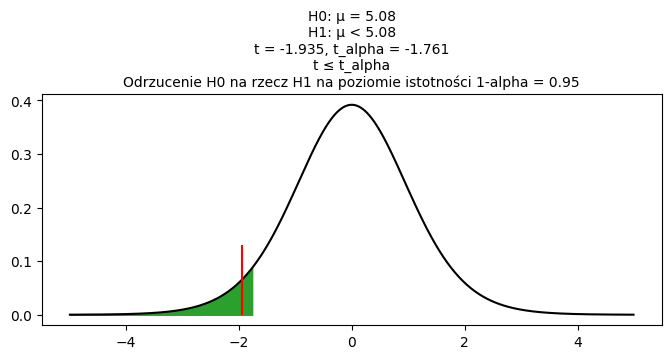

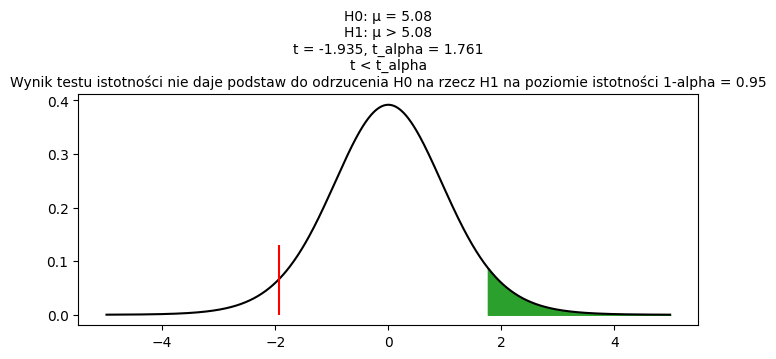

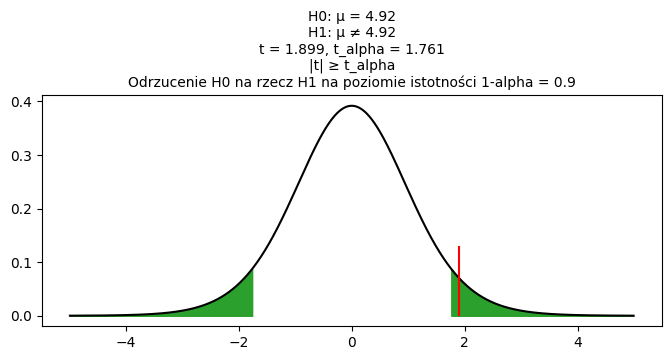

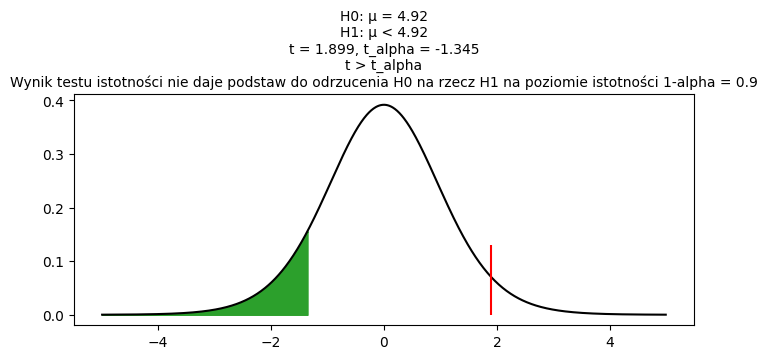

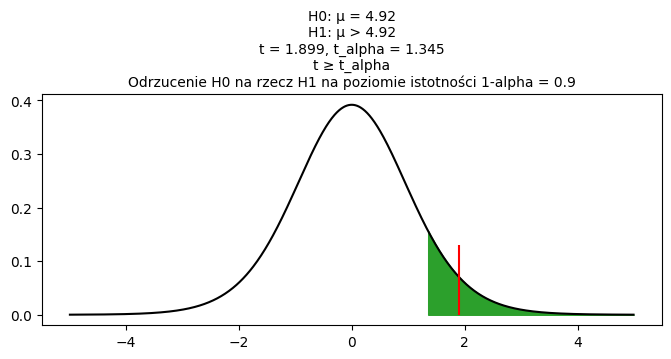

In [7]:
### Komórka testowa

assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)))

assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "two-sided", 0.1), (1.8994107469740968, 1.7613101357748562, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "less", 0.1), (1.8994107469740968, -1.3450303744546486, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "greater", 0.1), (1.8994107469740968, 1.345030374454649, 1)))

### Zadanie 2: Weryfikacja hipotezy o wariancji [10 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki chi2.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk chi2 i chi2_alpha lub chi2, chi2_alpha_1 i chi2_alpha_2 (w zależności od postaci obszaru krytycznego),
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku chi2, chi2_alpha, chi2_alpha_1 i chi2_alpha_2, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: s^2 = 25`</br>
    `H1: s^2 > 25`</br>
    `chi2 = 40.0000, chi2_alpha = 30.1435`</br>
    `chi2 <= chi2_alpha`</br>
    `Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [8]:
def variance_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej.
    H0: float
        Wariancji przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wariancja jest różna od wartości przyjętej w H0,
        - less: wariancja jest mniejsza od wartości przyjętej w H0,
        - greater: wariancja jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    chi2: float
        Wyliczona na podstawie próby losowej wartość statystyki chi2.
    chi2_alpha: float or list
        Wartość statystyki chi2_alpha lub lista z dwoma wartościami chi2_alpha_1 i chi2_alpha_2
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    n = len(data)
    chi2 = (n-1)*data['x'].std()**2/H0
    
    x_start = sp.stats.chi2.ppf(df=n-1, q=0.0001)
    x_stop = sp.stats.chi2.ppf(df=n-1, q=0.9999)
    x = np.linspace(x_start, x_stop, 1000)
    y = sp.stats.chi2.pdf(x, df=n-1)
    plt.figure(figsize=(8,3))
    plt.plot(x, y, 'k')
    
    if H1 == 'two-sided':
        chi2_a1 = sp.stats.chi2.ppf(alpha/2, n-1)
        chi2_a2 = sp.stats.chi2.ppf(1-alpha/2, n-1)
        parameters = 'chi2 = {:.4}, chi2_alpha1 = {:.4}, chi2_alpha2 = {:.4}'.format(chi2, chi2_a1, chi2_a2)
        H = int(chi2<=chi2_a1 or chi2>=chi2_a2)
        sign = '≠'
        comp = 'chi2 ≤ chi2_alpha1 lub chi2 ≥ chi2_alpha2' if H else 'chi2_alpha1 < chi2 < chi2_alpha2'
        edge1 = np.searchsorted(x, sp.stats.chi2.ppf(df=n-1, q=alpha/2))
        edge2 = np.searchsorted(x, sp.stats.chi2.ppf(df=n-1, q=1-alpha/2))
        plt.fill_between(x[:edge1], y[:edge1], color='tab:green')
        plt.fill_between(x[edge2:], y[edge2:], color='tab:green')
    elif H1 == 'less':
        chi2_a = sp.stats.chi2.ppf(alpha, n-1)
        parameters = 'chi2 = {:.4}, chi2_alpha = {:.4}'.format(chi2, chi2_a)
        H = int(chi2<=chi2_a)
        sign = '<'
        comp = 'chi2 ≤ chi2_alpha' if H else 'chi2 > chi2_alpha'
        edge1 = np.searchsorted(x, sp.stats.chi2.ppf(df=n-1, q=alpha))
        plt.fill_between(x[:edge1], y[:edge1], color='tab:green')
    elif H1 == 'greater':
        chi2_a = sp.stats.chi2.ppf(1-alpha, n-1)
        parameters = 'chi2 = {:.4}, chi2_alpha = {:.4}'.format(chi2, chi2_a)
        H = int(chi2>=chi2_a)
        sign = '>'
        comp = 'chi2 ≥ chi2_alpha' if H else 'chi2 < chi2_alpha'
        edge2 = np.searchsorted(x, sp.stats.chi2.ppf(df=n-1, q=1-alpha))
        plt.fill_between(x[edge2:], y[edge2:], color='tab:green')

    plt.vlines(chi2, ymin=0, ymax=y.max()/3, color='r')
    
    if H:
        plt.title("""H0: σ2 = {0}
H1: σ2 {1} {0}
{2}
{3}
Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {4}""".format(H0, sign, parameters, comp, 1-alpha), fontsize=10)
    else:
        plt.title("""H0: σ2 = {0}
H1: σ2 {1} {0}
{2}
{3}
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {4}""".format(H0, sign, parameters, comp, 1-alpha), fontsize=10)
    plt.show()
    
    if H1 == 'two-sided':
        return chi2, [chi2_a1, chi2_a2], H
    else:
        return chi2, chi2_a, H

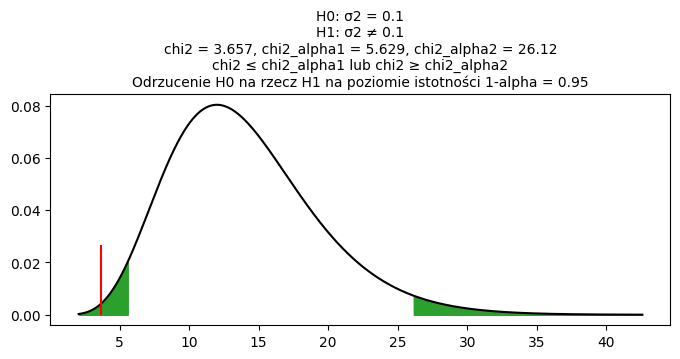

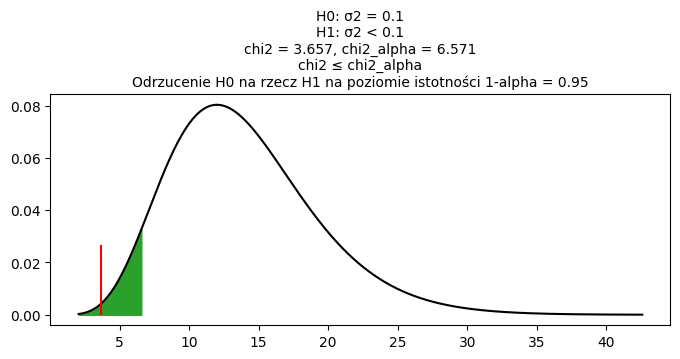

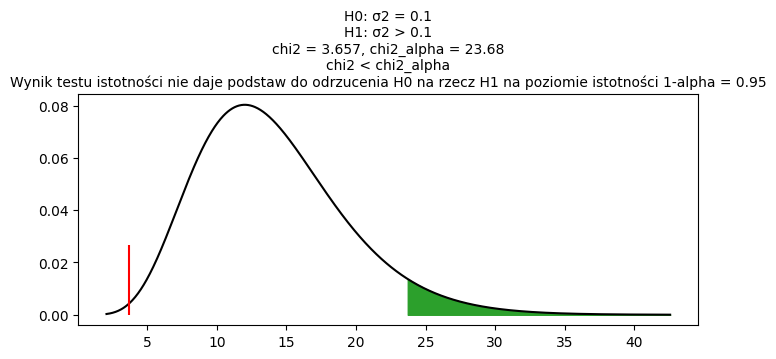

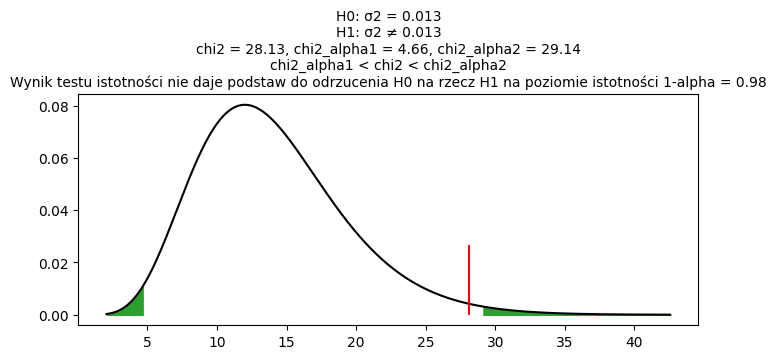

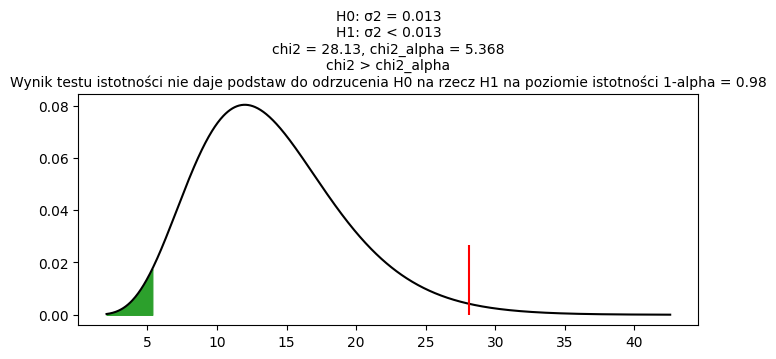

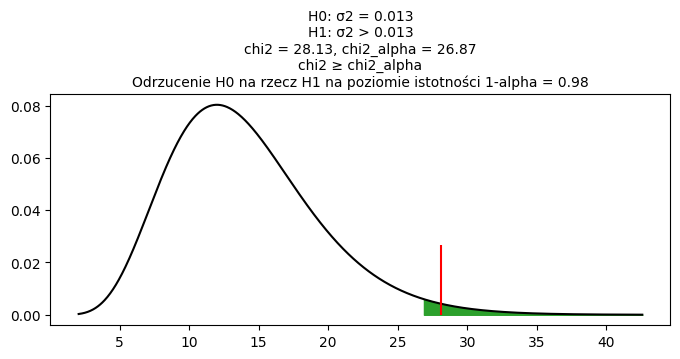

In [9]:
### Komórka testowa

results = variance_NHST(test_data_1, 0.1, "two-sided", 0.05)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (3.657103504858619, 5.628726103039731, 26.11894804503737, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "less", 0.05), (3.657103504858619, 6.570631383789345, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "greater", 0.05), (3.657103504858619, 23.684791304840576, 0)))

results = variance_NHST(test_data_1, 0.013, "two-sided", 0.02)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (28.13156542198938, 4.660425062657768, 29.141237740672796, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "less", 0.02), (28.13156542198938, 5.368197419889671, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "greater", 0.02), (28.13156542198938, 26.872764642314312, 1)))

### Zadanie 3: Weryfikacja hipotezy o wskaźniku struktury (proporcji) [10 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji) i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki u.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk u i u_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku u i u_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: p = 0.3`</br>
    `H1: p > 0.3`</br>
    `u = 1.0494, u_alpha = 1.6449`</br>
    `u < u_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [10]:
def proportion_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej (True, False).
    H0: float
        Wartość wskaźnika struktury przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość wskaźnika struktury jest różna od wartości przyjętej w H0,
        - less: wartość wskaźnika struktury jest mniejsza od wartości przyjętej w H0,
        - greater: wartość wskaźnika struktury jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby losowej wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    p0 = H0
    n = len(data['x'])
    p = data['x'].sum() / n
    
    u = (p - p0) / math.sqrt(p0*(1-p0)/n)
    
    x_start = sp.stats.norm.ppf(0.0001)
    x_stop = sp.stats.norm.ppf(0.9999)
    x = np.linspace(x_start, x_stop, 1000)
    y = sp.stats.norm.pdf(x)
    plt.figure(figsize=(8,3))
    plt.plot(x, y, 'k')
    
    
    if H1 == 'two-sided':
        sign = '≠'
        inequality_reject = '|u| >= u_alpha'
        inequality_keep = '|u| < u_alpha'
        u_alpha = sp.stats.norm.ppf(1 - alpha/2)
        fill_x1 = np.linspace(x_start, -u_alpha, 500)
        fill_x2 = np.linspace(u_alpha, x_stop, 500)
        fill_y1 = sp.stats.norm.pdf(fill_x1)
        fill_y2 = sp.stats.norm.pdf(fill_x2)
        plt.fill_between(fill_x1, fill_y1, color='tab:green')
        plt.fill_between(fill_x2, fill_y2, color='tab:green')
        H = int(abs(u) >= u_alpha)
        
    elif H1 == 'less':
        sign = '<'
        inequality_reject = 'u <= u_alpha'
        inequality_keep = 'u > u_alpha'
        u_alpha = sp.stats.norm.ppf(alpha)
        fill_x = np.linspace(x_start, u_alpha, 500)
        fill_y = sp.stats.norm.pdf(fill_x)
        plt.fill_between(fill_x, fill_y, color='tab:green')
        H = int(u <= u_alpha)
    elif H1 == 'greater':
        sign = '>'
        inequality_reject = 'u >= u_alpha'
        inequality_keep = 'u < u_alpha'
        u_alpha = sp.stats.norm.ppf(1 - alpha)
        fill_x = np.linspace(u_alpha, x_stop, 500)
        fill_y = sp.stats.norm.pdf(fill_x)
        plt.fill_between(fill_x, fill_y, color='tab:green')
        H = int(u >= u_alpha)
    
    plt.vlines(u, ymin=0, ymax=y.max()/3, color='r')
    
    if H:
        plt.title(f"""H0: p = {H0}
H1: p {sign} {H0}
{u = :.4f} {u_alpha = :.4f}
{inequality_reject}
Odrzucenie H0 na rzecz H1 na poziomie istotności {1-alpha = }""", fontsize=10)
    else:
        plt.title(f"""H0: p = {H0}
H1: p {sign} {H0}
{u = :.4f} {u_alpha = :.4f}
{inequality_keep}
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności {1-alpha = }""", fontsize=10)
    
    return u, u_alpha, H

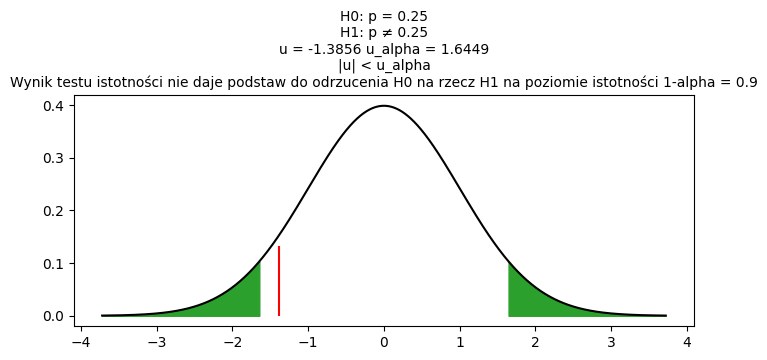

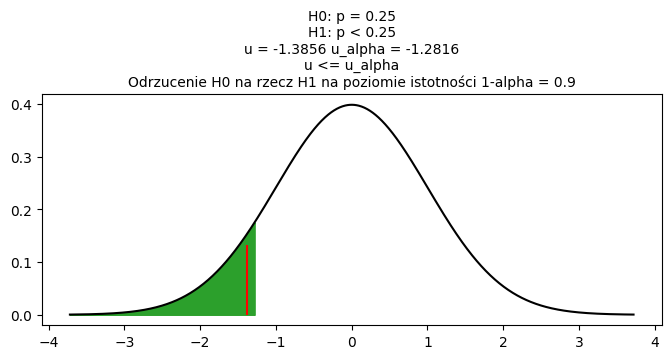

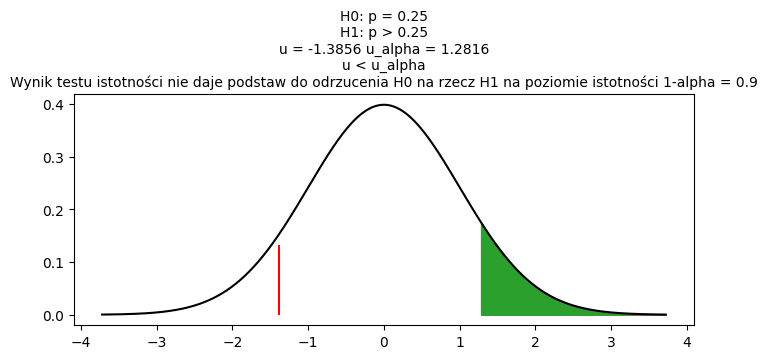

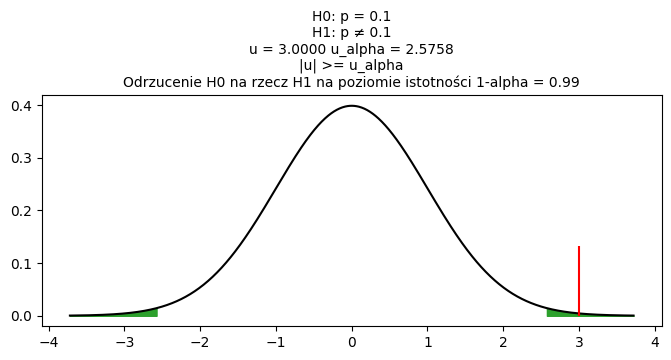

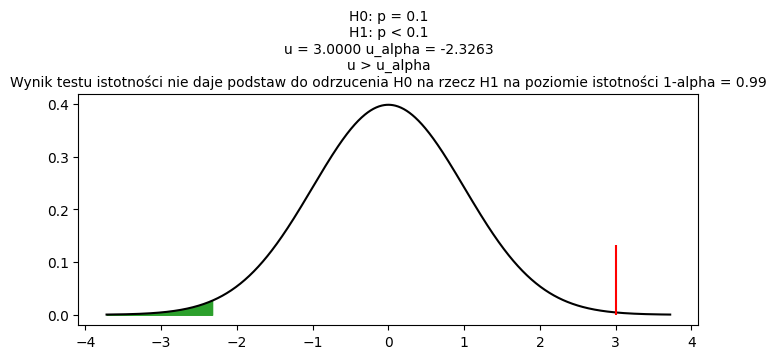

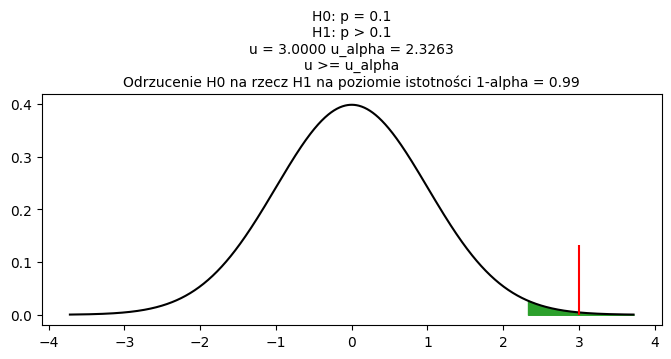

In [11]:
### Komórka testowa
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "two-sided", 0.1), (-1.3856406460551018, 1.6448536269514722, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "less", 0.1), (-1.3856406460551018, -1.2815515655446004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "greater", 0.1), (-1.3856406460551018, 1.2815515655446004, 0)))

assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "two-sided", 0.01), (2.9999999999999996, 2.5758293035489004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "less", 0.01), (2.9999999999999996, -2.3263478740408408, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "greater", 0.01), (2.9999999999999996, 2.3263478740408408, 1)))